# Emotions in text
- 데이터셋 출처 : https://www.kaggle.com/datasets/ishantjuyal/emotions-in-text
- 문장의 감정분류 데이터셋

# GPU 사용 여부 확인

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

Sun Dec 18 14:00:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  CUDA GPU            On   | 00000000:3F:00.0 Off |                  Off |
| 53%   74C    P2   239W / 260W |     48MiB /  4050MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 라이브러리 로드

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 버전 호환성 문제 (경고 메시지) 무시
import warnings
warnings.filterwarnings("ignore")

In [34]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

# 데이터 로드

In [4]:
# !unzip dataset.zip

In [5]:
file_name = 'Emotion_final.csv'
file_name

'Emotion_final.csv'

In [6]:
data = pd.read_csv(file_name)
print(data.shape)
data.head()

(21459, 2)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# 데이터 구조 확인

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


- 결측치 없음

In [8]:
data.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


- 감정을 나타내는 키워드는 총 6개임

In [9]:
data['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

- 감정 키워드 : happy, sadness, anger, fear, love, surprise

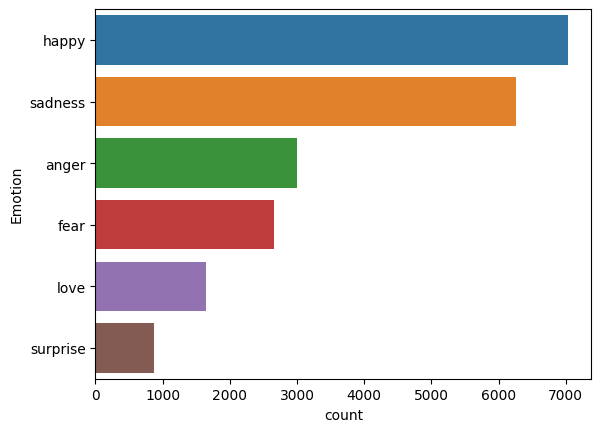

In [10]:
sns.countplot(y=data["Emotion"], order=data["Emotion"].value_counts().index);

- 집계 순위 : happy > sadness > anger > fear > love > surprise

# 데이터셋 나누기

In [11]:
X = data["Text"]
y = data["Emotion"]

X.shape, y.shape

((21459,), (21459,))

## 인코딩 작업하기
- 인코딩하고자하는 컬럼 : 'Emotion'
- 인코딩 후 생성될 컬럼은 6개

In [12]:
y_onehot = pd.get_dummies(y)
print(y_onehot.shape)
y_onehot.head()

(21459, 6)


,anger,fear,happy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0


## Train, Test 

In [13]:
# 라벨값의 비율을 고르게 나누기 위해 train_test_split 함수를 사용한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, 
                                                    test_size=.2, random_state=42
                                                    , stratify=y_onehot)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17167,), (17167, 6), (4292,), (4292, 6))

In [14]:
print(y_train.value_counts(normalize=True))
print("="*80)
print(y_test.value_counts(normalize=True))

anger  fear  happy  love  sadness  surprise
0      0     1      0     0        0           0.327547
             0      0     1        0           0.291955
1      0     0      0     0        0           0.139454
0      1     0      0     0        0           0.123609
       0     0      1     0        0           0.076484
                    0     0        1           0.040951
dtype: float64
anger  fear  happy  love  sadness  surprise
0      0     1      0     0        0           0.327586
             0      0     1        0           0.291938
1      0     0      0     0        0           0.139562
0      1     0      0     0        0           0.123486
       0     0      1     0        0           0.076421
                    0     0        1           0.041007
dtype: float64


# Tokenizer 

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
# 단어 사전의 크기는 10000으로 설정한다.
# 느낌표나 마침표 같은 구두점은 자동 제거 됨

vocab_size = 10000
oov_tok = "<oov>"
tokenizer = Tokenizer(num_words=vocab_size, lower=True, oov_token = oov_tok)

In [17]:
tokenizer.fit_on_texts(X_train)

In [18]:
# 단어 사전을 딕셔너리 형태로 반환
word_to_index = tokenizer.word_index
word_to_index

{'<oov>': 1,
 'i': 2,
 'feel': 3,
 'and': 4,
 'to': 5,
 'the': 6,
 'a': 7,
 'of': 8,
 'that': 9,
 'feeling': 10,
 'my': 11,
 'in': 12,
 'it': 13,
 'like': 14,
 'was': 15,
 'for': 16,
 'so': 17,
 'im': 18,
 'me': 19,
 'but': 20,
 'have': 21,
 'is': 22,
 'with': 23,
 'this': 24,
 'am': 25,
 'not': 26,
 'about': 27,
 'be': 28,
 'as': 29,
 'on': 30,
 'you': 31,
 'at': 32,
 'just': 33,
 'when': 34,
 'or': 35,
 'all': 36,
 'because': 37,
 'more': 38,
 'do': 39,
 'up': 40,
 'can': 41,
 'he': 42,
 'really': 43,
 't': 44,
 'been': 45,
 'by': 46,
 'are': 47,
 'very': 48,
 'had': 49,
 'know': 50,
 'if': 51,
 'her': 52,
 'out': 53,
 'time': 54,
 'myself': 55,
 'what': 56,
 'from': 57,
 'they': 58,
 'how': 59,
 'get': 60,
 'little': 61,
 'now': 62,
 'will': 63,
 'being': 64,
 'would': 65,
 'she': 66,
 'people': 67,
 'them': 68,
 'some': 69,
 'an': 70,
 'him': 71,
 'want': 72,
 'who': 73,
 'his': 74,
 'one': 75,
 'still': 76,
 'even': 77,
 'think': 78,
 'ive': 79,
 'there': 80,
 'life': 81,
 'its': 

In [19]:
pd.DataFrame(tokenizer.word_counts.items()).sort_values(1, ascending=False).set_index(0).T

,i,feel,and,to,the,a,of,that,feeling,my,...,czech,musically,rowan,bracelets,bracelet,fleet,adequate,ply,tweedy,chuc
1,26083,11137,10258,9580,9478,6671,5493,5228,5224,4415,...,1,1,1,1,1,1,1,1,1,1


- 분류된 단어가 약 17152개 (컬럼수)

## 텍스트를 숫자 형태로 변경

In [20]:
# texts_to_sequences를 이용하여 text 문장을 숫자로 이루어진 리스트로 변경
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [21]:
print(X_train[0])
print("="*50)
print(train_sequences[0])

i didnt feel humiliated
[2, 182, 10, 1047, 4, 2, 25, 2152, 11, 8224]


- 위 값을 보면, X_train[0]과 train_sequences[0] 값은 서로 관계가 없다는 것을 알 수 있음
- 단어 사전에서 182번에 해당하는 단어는 'started' 임

## 테스트(texts_to_sequences)

In [22]:
# key값을 리스트로 가져오기
list_key = [k for k in word_to_index.keys()]
print(len(list_key))
print(list_key[:5])

17153
['<oov>', 'i', 'feel', 'and', 'to']


In [23]:
# train_sequences[10]에 대한 문장 알아보기
# word_to_index 에서는 인덱스값이 1부터 시작하기 때문에 1을 빼 줌
sample = [list_key[i-1] for i in train_sequences[10]]
sample

['im', 'feeling', 'really', 'good', 'about', 'it']

In [24]:
# train_sequences[10]를 숫자로 변경하기 전 text 문장
X_train[X_train.str.contains('im feeling really good about it')]

7661    im feeling really good about it
Name: Text, dtype: object

**정리**
- '\<oov>\'는 사전에 없는 단어를 뜻함 (단어수 제한 시 사전에 없는 단어 등장 시에 처리되는 값)
- 또한, X_train을 숫자로 변경하는 과정에서 순서가 바뀜 (X_train[0]과 train_sequences[0] 값은 다름)

# Padding

In [26]:
# 시퀀스 길이 최댓값 
max([len(x) for x in train_sequences]), max([len(y) for y in test_sequences])

(66, 62)

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 길이를 sequences 길이를 고려하여 설정
max_length = 70
# 빈 값(0)을 뒤에 오도록 설정
padding_type = "post"

X_train_sp = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type)
X_test_sp = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type)

X_train_sp.shape, X_test_sp.shape

((17167, 70), (4292, 70))

In [28]:
display(X_train_sp[0])
display(X_test_sp[0])

array([   2,  182,   10, 1047,    4,    2,   25, 2152,   11, 8224,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

array([  79,    7,   10,    1,    1,   65,  229,   19,   75,    8,   52,
        615,  940,   51,    2,   77,  617, 7200,   52,   12,  123,    1,
       4608,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

# Modeling

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dropout, BatchNormalization

In [30]:
# 임베딩할 벡터 차원 설정
embedding_dim = 64

# 정답값을 n_class 변수에 할당
n_class = y_train.shape[1]

In [31]:
"임베딩할 벡터 차원", embedding_dim, "정답값 개수", n_class

('임베딩할 벡터 차원', 64, '정답값 개수', 6)

## Train, Validation 데이터셋 나누기

In [32]:
# 균형있게 학습시키기 위해 train_test_split 을 이용하여 train, validation 을 나눈다.
X_train_val, X_valid, y_train_val, y_valid = train_test_split(X_train_sp, y_train,
                                                              test_size=.2, random_state=42, stratify=y_train)
X_train_val.shape, y_train_val.shape, X_valid.shape, y_valid.shape

((13733, 70), (13733, 6), (3434, 70), (3434, 6))

## simple RNN

### 레이어 쌓기

In [35]:
# Simple RNN 레이어를 사용한 모델을 정의
model1 = Sequential()
# 입력-임베딩층
model1.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model1.add(Bidirectional(SimpleRNN(units=32, return_sequences=True)))
model1.add(Bidirectional(SimpleRNN(units=32)))
model1.add(Dense(units=16, activation='relu'))
# 출력층
model1.add(Dense(units=n_class, activation="softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 64)            640000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 70, 64)           6208      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               6208      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 653,558
Trainable params: 653,558
Non-tr

### 컴파일

In [36]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 학습

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [38]:
# 모델 학습을 실행합니다.
history1 = model1.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 107s 241ms/step - loss: 1.5315 - accuracy: 0.3848 - val_loss: 1.3115 - val_accuracy: 0.5134
Epoch 2/100
430/430 [==============================] - 104s 242ms/step - loss: 0.9275 - accuracy: 0.6575 - val_loss: 0.8997 - val_accuracy: 0.6887
Epoch 3/100
430/430 [==============================] - 113s 263ms/step - loss: 0.4267 - accuracy: 0.8537 - val_loss: 0.9300 - val_accuracy: 0.7006
Epoch 4/100
430/430 [==============================] - 118s 273ms/step - loss: 0.2010 - accuracy: 0.9373 - val_loss: 1.1034 - val_accuracy: 0.6858
Epoch 5/100
430/430 [==============================] - 126s 294ms/step - loss: 0.1056 - accuracy: 0.9712 - val_loss: 1.2324 - val_accuracy: 0.6904
Epoch 6/100
430/430 [==============================] - 117s 272ms/step - loss: 0.0870 - accuracy: 0.9750 - val_loss: 1.5015 - val_accuracy: 0.6587
Epoch 7/100
430/430 [==============================] - 121s 281ms/step - loss: 0.0688 - accuracy: 0.9814 - val_loss: 1

### 결과 확인

In [39]:
df_hist1 = pd.DataFrame(history1.history)
df_hist1

,loss,accuracy,val_loss,val_accuracy
0,1.531525,0.384839,1.311515,0.513395
1,0.927488,0.657467,0.899671,0.688701
2,0.426734,0.853710,0.929955,0.700641
3,0.200981,0.937304,1.103402,0.685789
4,0.105608,0.971237,1.232419,0.690448
5,0.087030,0.975024,1.501483,0.658707
6,0.068812,0.981432,1.421589,0.689284


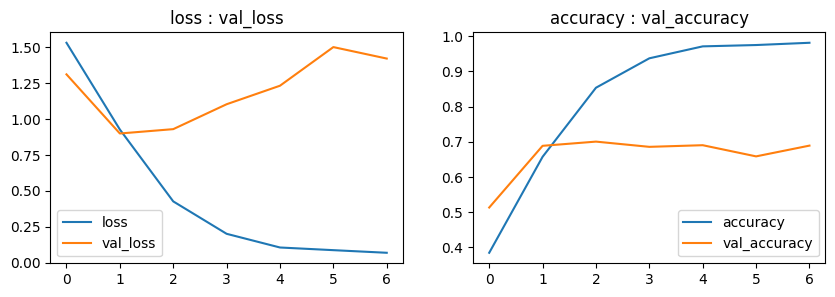

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist1[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist1[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 예측

In [42]:
y_pred = model1.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 6s 39ms/step


array([[9.7172576e-01, 1.3485386e-08, 8.3828444e-04, 2.7236795e-02,
        1.9915673e-04, 5.9935189e-08],
       [9.0555358e-04, 1.3057262e-04, 6.9827356e-06, 2.1536572e-08,
        9.9895680e-01, 5.4408962e-09],
       [3.0677788e-06, 3.4087485e-08, 9.9997747e-01, 1.0887178e-05,
        8.3153418e-06, 2.7506982e-07],
       [9.9430931e-01, 1.2033119e-07, 4.6165846e-04, 2.6491217e-03,
        2.5798378e-03, 2.7203606e-08],
       [1.2050617e-01, 1.8202982e-08, 8.5947275e-01, 1.9171262e-02,
        8.4963039e-04, 1.2056321e-07]], dtype=float32)

### 평가

In [43]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [44]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [45]:
# 성능 확인
(y_test_val == y_predict).mean()

0.6821994408201305

In [58]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[3])
print("="*80)
print("예측 감정 :", y_predict[3])
print("정답 감정 :", y_test_val[3])

텍스트 : i feel like i meet the most subtly obnoxious annoying people in the universe
예측 감정 : 0
정답 감정 : 0


- i feel like i meet the most subtly obnoxious annoying people in the universe
  - 우주에서 가장 미묘하게 짜증나는 사람을 만난 것 같은 기분이다.
 
- 예측 감정 : anger(0) 
- 정답 감정 : anger(0)
<br>: 감정 분석이 제대로 이루어짐

## LSTM (1)

### 레이어 쌓기

In [59]:
model2 = Sequential()
# 입력-임베딩층
model2.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model2.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model2.add(Bidirectional(LSTM(units=32)))
model2.add(Dense(units=16, activation='relu'))
# 출력층
model2.add(Dense(units=n_class, activation="softmax"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 70, 64)            640000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 70, 64)           24832     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 6)                 102       
                                                                 
Total params: 690,806
Trainable params: 690,806
Non-tr

### 컴파일

In [60]:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 학습

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [62]:
history2 = model2.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100


2022-12-18 14:30:18.202765: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


430/430 [==============================] - 22s 38ms/step - loss: 1.2259 - accuracy: 0.5083 - val_loss: 0.7219 - val_accuracy: 0.7443
Epoch 2/100
430/430 [==============================] - 21s 50ms/step - loss: 0.4602 - accuracy: 0.8442 - val_loss: 0.4821 - val_accuracy: 0.8413
Epoch 3/100
430/430 [==============================] - 19s 44ms/step - loss: 0.2446 - accuracy: 0.9237 - val_loss: 0.3889 - val_accuracy: 0.8727
Epoch 4/100
430/430 [==============================] - 20s 48ms/step - loss: 0.1558 - accuracy: 0.9508 - val_loss: 0.4087 - val_accuracy: 0.8678
Epoch 5/100
430/430 [==============================] - 18s 41ms/step - loss: 0.1129 - accuracy: 0.9627 - val_loss: 0.3899 - val_accuracy: 0.8911
Epoch 6/100
430/430 [==============================] - 19s 44ms/step - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.4226 - val_accuracy: 0.8803
Epoch 7/100
430/430 [==============================] - 21s 49ms/step - loss: 0.0663 - accuracy: 0.9784 - val_loss: 0.4175 - val_accuracy: 0.88

### 결과 확인

In [63]:
df_hist2 = pd.DataFrame(history2.history)
df_hist2

,loss,accuracy,val_loss,val_accuracy
0,1.225949,0.508338,0.721945,0.744321
1,0.460212,0.844244,0.482124,0.841293
2,0.244594,0.923687,0.388921,0.872743
3,0.155815,0.950848,0.408710,0.867793
4,0.112857,0.962718,0.389854,0.891089
5,0.078296,0.975242,0.422590,0.880315
6,0.066258,0.978446,0.417538,0.886721
7,0.061388,0.980922,0.477382,0.878858
8,0.053455,0.981432,0.477730,0.887303
9,0.042590,0.985291,0.448805,0.893128


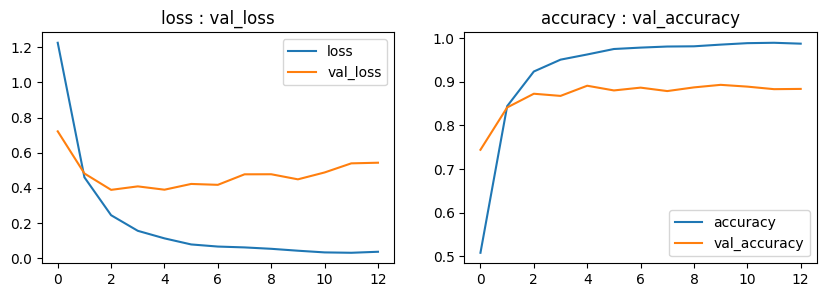

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist2[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist2[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 예측

In [65]:
y_pred = model2.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 9ms/step


array([[9.9917895e-01, 3.3601516e-04, 2.7804615e-06, 2.2147029e-09,
        4.8174846e-04, 4.8446736e-07],
       [7.1804585e-05, 8.0515201e-06, 3.0940719e-05, 3.3754506e-09,
        9.9988914e-01, 1.4590862e-09],
       [2.7867802e-04, 3.3537784e-04, 9.9596077e-01, 6.2592089e-04,
        2.7274622e-03, 7.1746756e-05],
       [9.9811459e-01, 7.1257167e-04, 8.7014796e-06, 1.1147051e-08,
        1.1628415e-03, 1.2964974e-06],
       [8.1256003e-05, 5.5239175e-04, 9.9806398e-01, 3.8364597e-04,
        8.1324426e-04, 1.0545406e-04]], dtype=float32)

### 평가

In [66]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [67]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [68]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8823392357875116

In [72]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[8])
print("="*100)
print("예측 감정 :", y_predict[8])
print("정답 감정 :", y_test_val[8])

텍스트 : i feel like maybe he is going to stop loving me or maybe its true and im a terrible wife
예측 감정 : 2
정답 감정 : 3


- i feel like maybe he is going to stop loving me or maybe its true and im a terrible wife
  - 나는 어쩌면 그가 나를 사랑하는 것을 멈출지도 모른다는 생각이 든다. 또는 어쩌면 그것은 사실이고 나는 끔찍한 아내이다.


- 예측 감정 : happy(2) 
- 정답 감정 : love(3)
<br>: 감정 분석이 제대로 이루어지지않음

In [73]:
# 확률값으로 확인하기
y_pred[8]

array([1.8226340e-03, 1.0750751e-05, 5.6879020e-01, 4.1339728e-01,
       1.5730012e-02, 2.4910446e-04], dtype=float32)

- 8번 인덱스에 위치한 텍스트에 대한 예측값은 가장 확률값이 큰 happy로 분류되었다.
- 실제 감정인 love의 확률값과 크게 차이가 나지 않는다.

In [75]:
y_pred[8][2] - y_pred[8][3]

0.15539292

- 0.15539292 차이로 인해 모델은 love가 아닌 happy로 분류했다.

## LSTM (2)

### 레이어 쌓기

In [76]:
model3 = Sequential()
# 입력-임베딩층
model3.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model3.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model3.add(Bidirectional(LSTM(units=64)))
model3.add(Dense(units=32, activation='selu'))
model3.add(Dense(units=32, activation='selu'))
# 출력층
model3.add(Dense(units=n_class, activation="softmax"))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 70, 64)            640000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 70, 128)          66048     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 6)                

### 컴파일

In [77]:
model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 학습

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [79]:
history3 = model3.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 13s 20ms/step - loss: 1.1242 - accuracy: 0.5657 - val_loss: 0.6389 - val_accuracy: 0.7787
Epoch 2/100
430/430 [==============================] - 7s 17ms/step - loss: 0.3420 - accuracy: 0.8839 - val_loss: 0.3538 - val_accuracy: 0.8789
Epoch 3/100
430/430 [==============================] - 7s 17ms/step - loss: 0.1517 - accuracy: 0.9475 - val_loss: 0.2940 - val_accuracy: 0.8992
Epoch 4/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0955 - accuracy: 0.9648 - val_loss: 0.3881 - val_accuracy: 0.8806
Epoch 5/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0790 - accuracy: 0.9721 - val_loss: 0.3299 - val_accuracy: 0.8995
Epoch 6/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0645 - accuracy: 0.9768 - val_loss: 0.3549 - val_accuracy: 0.9030
Epoch 7/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0499 - accuracy: 0.9826 - val_loss: 0.3905 - val_accuracy

### 결과 확인

In [80]:
df_hist3 = pd.DataFrame(history3.history)
df_hist3

,loss,accuracy,val_loss,val_accuracy
0,1.124204,0.565718,0.638943,0.778684
1,0.342045,0.883856,0.353765,0.878858
2,0.151658,0.947499,0.294016,0.899243
3,0.095469,0.964829,0.388110,0.880606
4,0.078968,0.972111,0.329942,0.899534
5,0.064510,0.976844,0.354906,0.903029
6,0.049851,0.982597,0.390473,0.893710
7,0.050135,0.981796,0.387458,0.889633
8,0.036523,0.985873,0.458774,0.891963
9,0.031922,0.988422,0.445834,0.884100


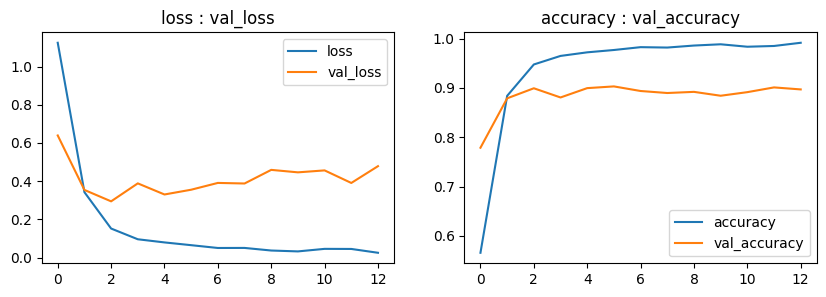

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist3[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist3[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 예측

In [82]:
y_pred = model3.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 7ms/step


array([[9.9886072e-01, 1.0334431e-05, 3.0390912e-04, 7.2213967e-04,
        2.7868980e-05, 7.4954958e-05],
       [1.5728676e-04, 7.5882417e-05, 8.8731525e-05, 1.9371997e-05,
        9.9964976e-01, 8.9595242e-06],
       [6.6342654e-05, 3.4746711e-06, 9.9977344e-01, 1.0408795e-04,
        2.1978156e-05, 3.0727082e-05],
       [7.2834241e-01, 2.3258140e-03, 4.2891178e-02, 1.6937282e-02,
        3.0924275e-04, 2.0919405e-01],
       [2.7979277e-05, 1.7643304e-06, 9.9986696e-01, 6.6600347e-05,
        1.5411462e-05, 2.1211345e-05]], dtype=float32)

### 평가

In [83]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [84]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [85]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8953867660764212

In [86]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[8])
print("="*100)
print("예측 감정 :", y_predict[8])
print("정답 감정 :", y_test_val[8])

텍스트 : i feel like maybe he is going to stop loving me or maybe its true and im a terrible wife
예측 감정 : 3
정답 감정 : 3


- i feel like maybe he is going to stop loving me or maybe its true and im a terrible wife
  - 나는 어쩌면 그가 나를 사랑하는 것을 멈출지도 모른다는 생각이 든다. 또는 어쩌면 그것은 사실이고 나는 끔찍한 아내이다.


- 예측 감정 : love(3) 
- 정답 감정 : love(3)
<br>: 감정 분석이 제대로 이루어짐

## GRU (1)

### 레이어 쌓기

In [87]:
model4 = Sequential()
# 입력-임베딩층
model4.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model4.add(Bidirectional(GRU(units=32, return_sequences=True)))
model4.add(Bidirectional(GRU(units=32)))
model4.add(Dense(units=16, activation='relu'))
# 출력층
model4.add(Dense(units=n_class, activation="softmax"))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 70, 64)            640000    
                                                                 
 bidirectional_8 (Bidirectio  (None, 70, 64)           18816     
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 16)                1040      
                                                                 
 dense_10 (Dense)            (None, 6)                 102       
                                                                 
Total params: 678,774
Trainable params: 678,774
Non-tr

### 컴파일

In [88]:
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 학습

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [90]:
history4 = model4.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 14s 19ms/step - loss: 1.2490 - accuracy: 0.5078 - val_loss: 0.7594 - val_accuracy: 0.7277
Epoch 2/100
430/430 [==============================] - 7s 16ms/step - loss: 0.4515 - accuracy: 0.8472 - val_loss: 0.3977 - val_accuracy: 0.8637
Epoch 3/100
430/430 [==============================] - 7s 16ms/step - loss: 0.1909 - accuracy: 0.9336 - val_loss: 0.3460 - val_accuracy: 0.8896
Epoch 4/100
430/430 [==============================] - 7s 16ms/step - loss: 0.1047 - accuracy: 0.9627 - val_loss: 0.3454 - val_accuracy: 0.8911
Epoch 5/100
430/430 [==============================] - 7s 16ms/step - loss: 0.0729 - accuracy: 0.9710 - val_loss: 0.3456 - val_accuracy: 0.8937
Epoch 6/100
430/430 [==============================] - 8s 19ms/step - loss: 0.0540 - accuracy: 0.9798 - val_loss: 0.3784 - val_accuracy: 0.8911
Epoch 7/100
430/430 [==============================] - 7s 16ms/step - loss: 0.0419 - accuracy: 0.9852 - val_loss: 0.3896 - val_accuracy

### 결과 확인

In [91]:
df_hist4 = pd.DataFrame(history4.history)
df_hist4

,loss,accuracy,val_loss,val_accuracy
0,1.249021,0.507755,0.759431,0.727723
1,0.451520,0.847229,0.397653,0.863716
2,0.190938,0.933591,0.345954,0.889633
3,0.104702,0.962718,0.345432,0.891089
4,0.072856,0.971019,0.345566,0.893710
5,0.053953,0.979757,0.378448,0.891089
6,0.041940,0.985218,0.389604,0.896040
7,0.038453,0.986529,0.463704,0.889051
8,0.035845,0.987038,0.411886,0.891380
9,0.025152,0.990971,0.443524,0.895457


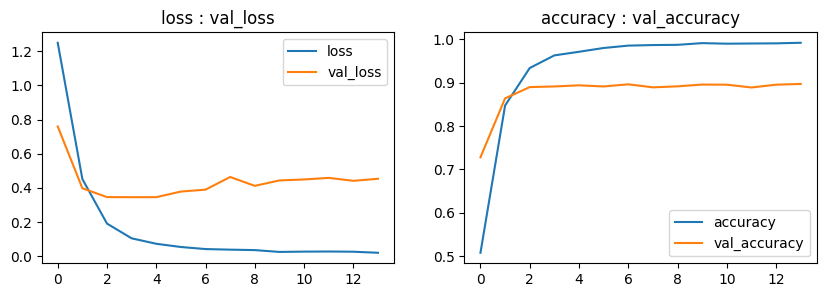

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist4[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist4[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 예측

In [93]:
y_pred = model4.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 7ms/step


array([[9.99909878e-01, 1.15328257e-05, 1.80263323e-05, 4.59624999e-07,
        4.02658043e-05, 1.97825393e-05],
       [3.97519107e-05, 8.06954267e-05, 2.31600552e-05, 1.27755557e-05,
        9.99843478e-01, 7.32116874e-08],
       [2.48753554e-06, 9.17141350e-08, 9.99861360e-01, 1.06177577e-04,
        2.67649084e-05, 2.97434667e-06],
       [9.99750078e-01, 1.02425896e-04, 4.99142743e-06, 2.15706294e-07,
        1.03859144e-04, 3.83852530e-05],
       [6.60780915e-06, 6.06916828e-08, 9.99915242e-01, 6.52979506e-05,
        9.82437268e-06, 2.88280944e-06]], dtype=float32)

### 평가

In [94]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [95]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [96]:
# 성능 확인
(y_test_val == y_predict).mean()

0.8960857409133272

In [97]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[10])
print("="*100)
print("예측 감정 :", y_predict[10])
print("정답 감정 :", y_test_val[10])

텍스트 : i feel that california democrats a little too smug in their safely liberal districts lend much value added to any serious debate but i usually find them less offensive
예측 감정 : 2
정답 감정 : 2


- i feel that california democrats a little too smug in their safely liberal districts lend much value added to any serious debate but i usually find them less offensive
  - 나는 캘리포니아 민주당원들이 그들의 안전한 자유주의 지역에서 약간 너무 독선적인 것이 어떤 심각한 토론에도 많은 가치를 제공한다고 느끼지만, 나는 보통 그들이 덜 불쾌하다고 생각한다.
  
  
- 예측 감정 : happy(2)
- 정답 감정 : happy(2)
<br>: 감정 분석이 제대로 이루어짐

## GRU (2)

### 레이어 쌓기

In [98]:
model5 = Sequential()
# 입력-임베딩층
model5.add(Embedding(input_dim=vocab_size, 
                     output_dim=embedding_dim, 
                     input_length=max_length))
model5.add(Bidirectional(GRU(units=64, return_sequences=True)))
model5.add(Bidirectional(GRU(units=64)))
model5.add(Dense(units=32, activation='selu'))
# 출력층
model5.add(Dense(units=n_class, activation="softmax"))
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 70, 64)            640000    
                                                                 
 bidirectional_10 (Bidirecti  (None, 70, 128)          49920     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              74496     
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 32)                4128      
                                                                 
 dense_12 (Dense)            (None, 6)                 198       
                                                                 
Total params: 768,742
Trainable params: 768,742
Non-tr

### 컴파일

In [99]:
model5.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

### 학습

In [100]:
history5 = model5.fit(X_train_val, y_train_val
                    , validation_data=(X_valid, y_valid), epochs=100, callbacks=[early_stop])

Epoch 1/100
430/430 [==============================] - 13s 19ms/step - loss: 1.0737 - accuracy: 0.5821 - val_loss: 0.4839 - val_accuracy: 0.8340
Epoch 2/100
430/430 [==============================] - 7s 17ms/step - loss: 0.2731 - accuracy: 0.9046 - val_loss: 0.2657 - val_accuracy: 0.9007
Epoch 3/100
430/430 [==============================] - 7s 17ms/step - loss: 0.1284 - accuracy: 0.9492 - val_loss: 0.2737 - val_accuracy: 0.9062
Epoch 4/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0881 - accuracy: 0.9635 - val_loss: 0.3082 - val_accuracy: 0.9100
Epoch 5/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0617 - accuracy: 0.9747 - val_loss: 0.3596 - val_accuracy: 0.8992
Epoch 6/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0558 - accuracy: 0.9795 - val_loss: 0.3144 - val_accuracy: 0.9109
Epoch 7/100
430/430 [==============================] - 7s 17ms/step - loss: 0.0450 - accuracy: 0.9821 - val_loss: 0.3547 - val_accuracy

### 결과 확인

In [101]:
df_hist5 = pd.DataFrame(history5.history)
df_hist5

,loss,accuracy,val_loss,val_accuracy
0,1.073687,0.582102,0.483947,0.834013
1,0.273069,0.904609,0.265657,0.900699
2,0.128358,0.949246,0.273653,0.906232
3,0.088142,0.963519,0.308203,0.910017
4,0.061657,0.974732,0.359561,0.899243
5,0.055794,0.979466,0.314418,0.910891
6,0.044978,0.982087,0.354699,0.910309
7,0.037355,0.986165,0.342294,0.911182
8,0.033028,0.988204,0.331864,0.911182
9,0.028100,0.989514,0.379682,0.903611


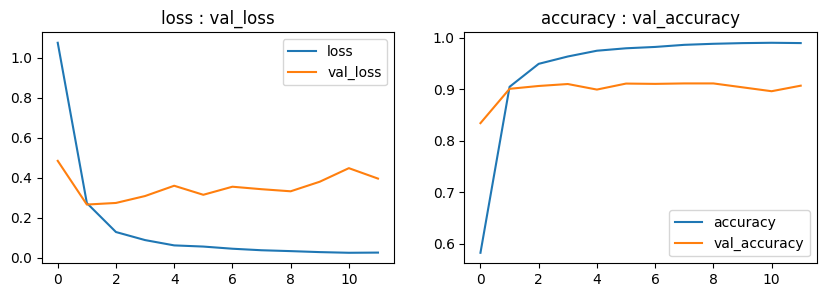

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

df_hist5[["loss", "val_loss"]].plot(ax=axes[0]).set_title("loss : val_loss")
df_hist5[["accuracy", "val_accuracy"]].plot(ax=axes[1]).set_title("accuracy : val_accuracy");

### 예측

In [103]:
y_pred = model5.predict(X_test_sp)
y_pred[:5]

135/135 [==============================] - 2s 7ms/step


array([[9.9474084e-01, 5.1532751e-03, 3.9480790e-05, 3.2526321e-05,
        2.7319995e-05, 6.5654895e-06],
       [3.0854386e-05, 5.7472516e-04, 5.7964741e-07, 1.0917541e-07,
        9.9936861e-01, 2.5187275e-05],
       [5.0358158e-06, 3.7694367e-06, 9.9994802e-01, 2.1529107e-05,
        1.9361465e-05, 2.2457134e-06],
       [9.9985325e-01, 9.4218551e-05, 2.0420817e-05, 3.1672447e-05,
        3.9044286e-07, 5.6454834e-08],
       [7.5846896e-05, 1.8373086e-06, 9.9978620e-01, 1.3556654e-04,
        2.6727261e-07, 3.2004365e-07]], dtype=float32)

### 평가

In [104]:
y_predict = np.argmax(y_pred, axis=1)
y_predict[:5]

array([0, 4, 2, 0, 2])

In [105]:
y_test_val = np.argmax(y_test.values, axis=1)
y_test_val[:5]

array([0, 4, 2, 0, 2])

In [106]:
# 성능 확인
(y_test_val == y_predict).mean()

0.9033084808946877

In [107]:
# 특정 텍스트에 대해 감정분류가 잘 되었는지 확인
print("텍스트 :", X_test.iloc[100])
print("="*100)
print("예측 감정 :", y_predict[100])
print("정답 감정 :", y_test_val[100])

텍스트 : i restrain all emotion asked asked her su wen is a laugh said see us smiling at the side maybe the feeling that i am sincere concern for su wen is right
예측 감정 : 2
정답 감정 : 2


- i restrain all emotion asked asked her su wen is a laugh said see us smiling at the side maybe the feeling that i am sincere concern for su wen is right
  - 나는 그녀에게 질문한 모든 감정을 억제한다. 그녀는 웃는다. 우리가 옆에서 웃고 있는 것을 보자. 아마도 내가 수웬을 진심으로 걱정한다는 느낌이 맞을 것이다.
  
- 예측 감정 : happy(2)
- 정답 감정 : happy(2)
<br>: 감정 분석이 제대로 이루어짐